In [37]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

In [11]:
from sklearn.datasets import load_wine
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)
df.head()
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [8]:
unique_elements, counts_elements = np.unique(df['target'], return_counts=True)
for elem, count in zip(unique_elements, counts_elements):
    print("elements in cluster", elem, " : ", count)

elements in cluster 0  :  59
elements in cluster 1  :  71
elements in cluster 2  :  48


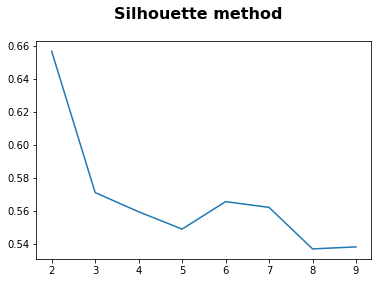

In [9]:
sse_1 = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, max_iter=50).fit(df)
    sse_1.append([k, silhouette_score(df, kmeans.labels_)])

plt.suptitle('Silhouette method', y=1, fontsize=16, fontweight ='semibold')
plt.plot(pd.DataFrame(sse_1)[0], pd.DataFrame(sse_1)[1])

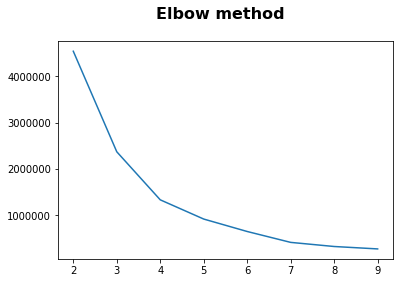

In [10]:
sse = []

for k in range(2,10):
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append([k, km.inertia_])
    
plt.suptitle('Elbow method', y=1, fontsize=16, fontweight ='semibold')
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1])

In [38]:

y = df.target
X = df.drop('target', axis=1)
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=123, 
                                                    stratify=y)

In [49]:
km = KMeans(n_clusters=3)
km.fit(X_train)
labels = km.predict(X_train)
centroids = km.cluster_centers_

results = km.predict(X_test)
to_compare = dict()
for j in range(3):
    to_compare[j] = []

for i in range(len(results)):
    to_compare[y_test.values[i]] += [results[i]]

for key in to_compare.keys():
    unique_elements, counts_elements = np.unique(to_compare[key], return_counts=True)
    acc = counts_elements[0]/ len(to_compare[key])
    
    print("clss: ", key, ", cluster: ", to_compare[key], ", acc = ",  acc)

clss:  0 , cluster:  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2] , acc =  1.0
clss:  1 , cluster:  [1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1] , acc =  0.9285714285714286
clss:  2 , cluster:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] , acc =  1.0
